In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import numpy.linalg

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install faraway

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 224 kB 4.1 MB/s 


![image.png](attachment:fb42bae8-a222-4f5c-8de4-f4387e9eb137.png)

In [3]:
import faraway.datasets.prostate
prostate = faraway.datasets.prostate.load()
prostate.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579819,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
1,-0.994252,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
2,-0.510826,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
3,-1.203973,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
4,0.751416,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156


In [4]:
print(faraway.datasets.prostate.DESCR)


Prostate cancer surgery

Description:

     The ‘prostate’ data frame has 97 rows and 9 columns. A study on 97
     men with prostate cancer who were due to receive a radical
     prostatectomy.

Variables:

     This data frame contains the following columns:

     ‘lcavol’ log(cancer volume)

     ‘lweight’ log(prostate weight)

     ‘age’ age

     ‘lbph’ log(benign prostatic hyperplasia amount)

     ‘svi’ seminal vesicle invasion

     ‘lcp’ log(capsular penetration)

     ‘gleason’ Gleason score

     ‘pgg45’ percentage Gleason scores 4 or 5

     ‘lpsa’ log(prostate specific antigen)

Source:

     Andrews DF and Herzberg AM (1985): Data. New York: Springer-Verlag



In [5]:
prostate.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.652689,63.865979,0.100356,0.216495,-0.179364,6.752577,24.381443,2.478387
std,1.178625,0.496629,7.445117,1.450807,0.413995,1.398248,0.722134,28.204035,1.154329
min,-1.347074,2.374900,41.000000,-1.386294,0.000000,-1.386290,6.000000,0.000000,-0.430780
25%,0.512824,3.375900,60.000000,-1.386294,0.000000,-1.386290,6.000000,0.000000,1.731660
50%,1.446919,3.623000,65.000000,0.300105,0.000000,-0.798510,7.000000,15.000000,2.591520
75%,2.127041,3.878500,68.000000,1.558145,0.000000,1.178650,7.000000,40.000000,3.056360
max,3.821004,6.107600,79.000000,2.326302,1.000000,2.904170,9.000000,100.000000,5.582930


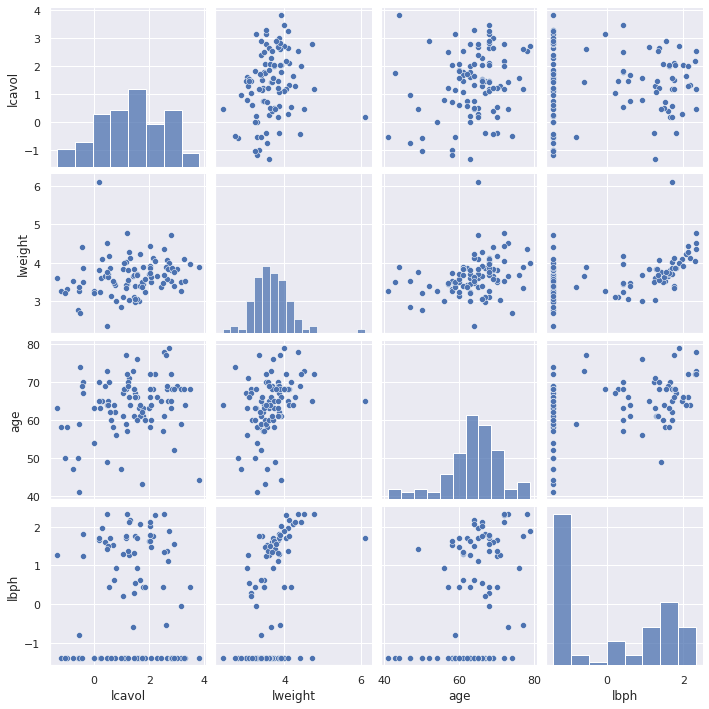

In [6]:
sns.pairplot(data=prostate.iloc[:, :4])

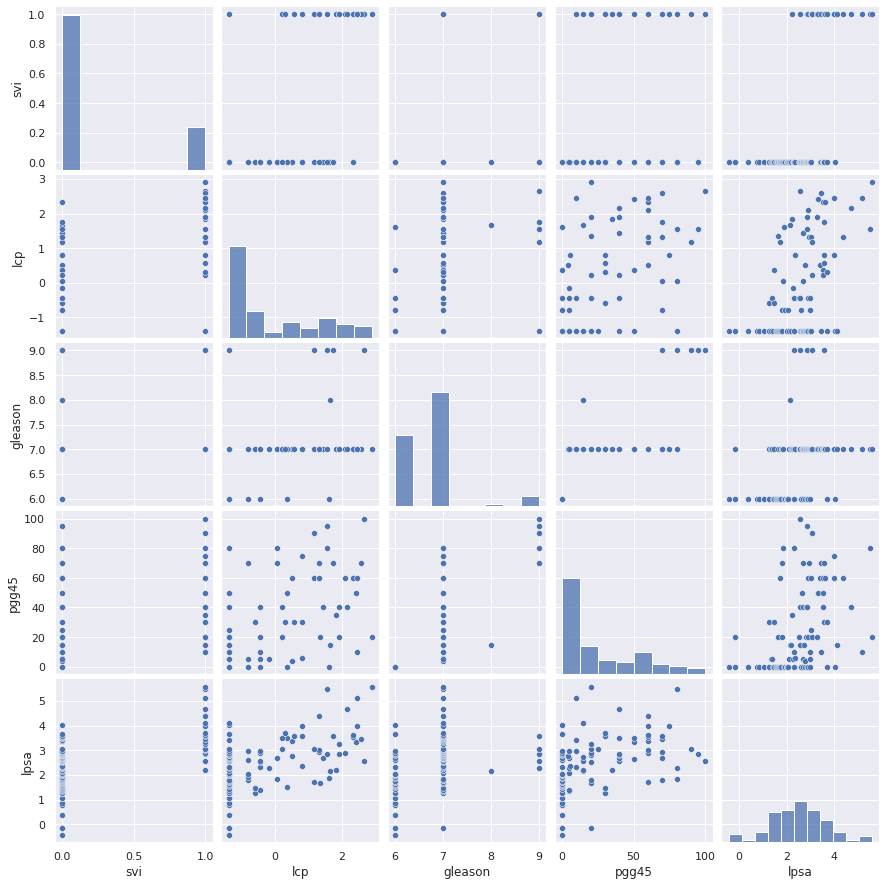

In [7]:
sns.pairplot(data=prostate.iloc[:, 4:])

In [8]:
print(prostate.loc[:, "lbph"].value_counts(ascending=False).iloc[:5])
prostate.loc[:, "lcp"].value_counts(ascending=False).iloc[:5]

-1.386294    43
 0.438255     5
 2.326302     3
 1.266948     2
 0.615186     2
Name: lbph, dtype: int64


-1.38629    45
-0.43078     6
-0.79851     5
 0.81093     3
 1.32176     3
Name: lcp, dtype: int64

Evidently, the minimum is artificial. This might represent 0 benign prostatic hyperplasia amount, or the fact that the corresponding records are invalid

In [9]:
prostate.iloc[:, :4].corr()

,lcavol,lweight,age,lbph
lcavol,1.000000,0.194128,0.225000,0.027350
lweight,0.194128,1.000000,0.307525,0.434932
age,0.225000,0.307525,1.000000,0.350186
lbph,0.027350,0.434932,0.350186,1.000000


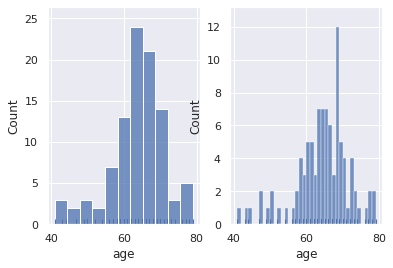

In [10]:
f, axes = plt.subplots(1, 2)

sns.histplot(data=prostate.age, ax=axes[0])
sns.rugplot(data=prostate.age, ax=axes[0])

sns.histplot(data=prostate.age, binwidth=1, ax=axes[1])
sns.rugplot(data=prostate.age, ax=axes[1])


In [11]:
melt = pd.melt(prostate.loc[:, ~prostate.columns.isin(['pgg45', 'age'])], id_vars=["lpsa"])
melt

,lpsa,variable,value
0,-0.43078,lcavol,-0.579819
1,-0.16252,lcavol,-0.994252
2,-0.16252,lcavol,-0.510826
3,-0.16252,lcavol,-1.203973
4,0.37156,lcavol,0.751416
...,...,...,...
577,4.38515,gleason,7.000000
578,4.68444,gleason,7.000000
579,5.14312,gleason,7.000000
580,5.47751,gleason,7.000000


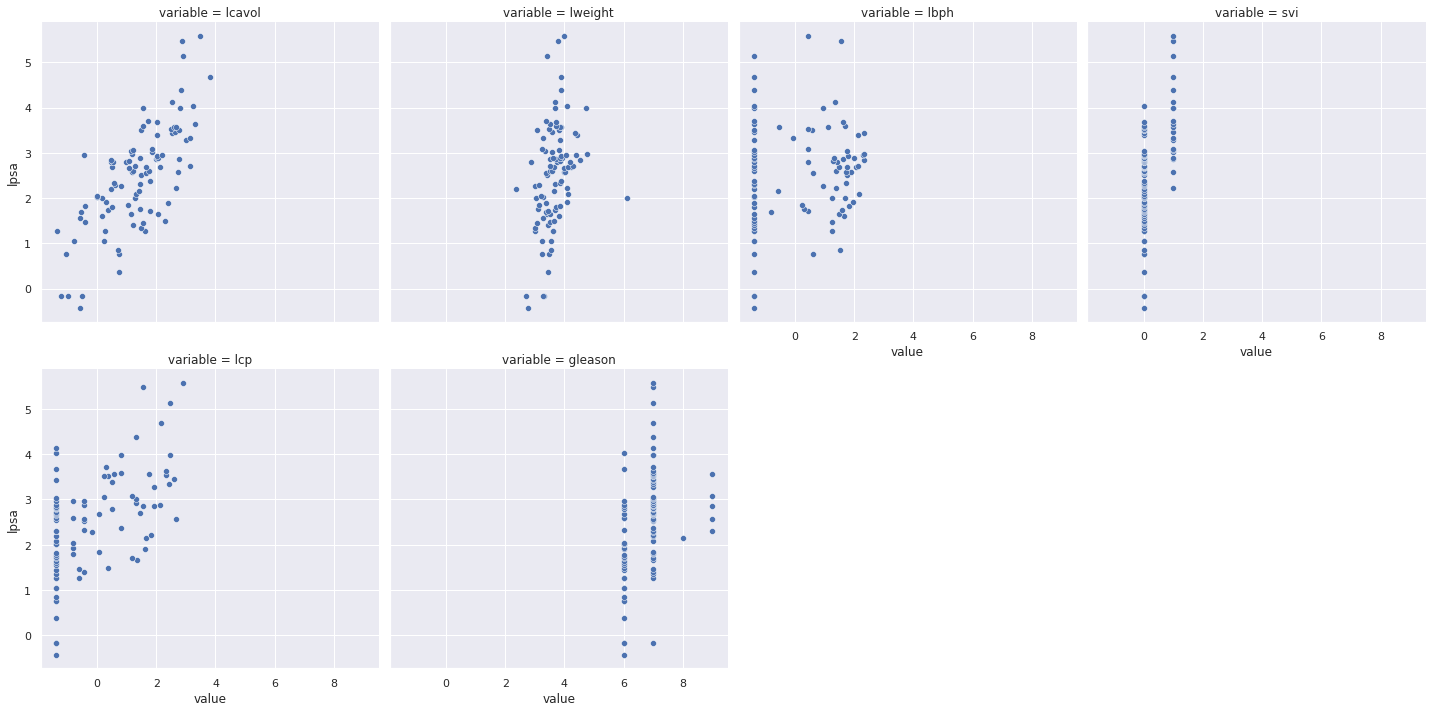

In [12]:
g = sns.relplot(data=melt, x="value", y="lpsa", col="variable", col_wrap=4)

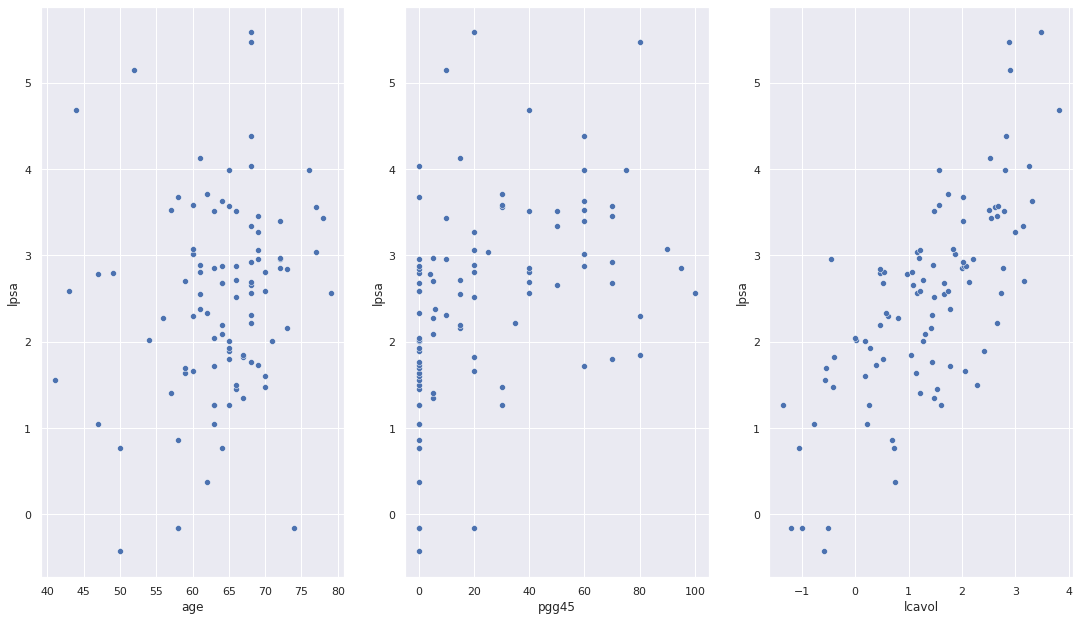

In [13]:

f, axes = plt.subplots(1, 3)
f.set_size_inches(18.5, 10.5)

sns.scatterplot(x="age", y="lpsa", data=prostate, ax=axes[0])
sns.scatterplot(x="pgg45", y="lpsa", data=prostate, ax=axes[1])
sns.scatterplot(x="lcavol", y="lpsa", data=prostate, ax=axes[2])



In [14]:
prostate.corr().loc[:, "lpsa"].sort_values(ascending=False)

lpsa       1.000000
lcavol     0.734460
svi        0.566218
lcp        0.548813
pgg45      0.422316
gleason    0.368987
lweight    0.354122
lbph       0.179810
age        0.169593
Name: lpsa, dtype: float64

![image.png](attachment:dcd932eb-3f67-442e-8366-c590940f5588.png)

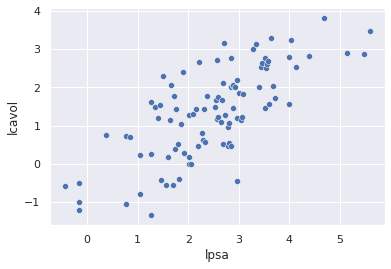

In [15]:
sns.scatterplot(x="lpsa", y="lcavol", data=prostate)

In [16]:
regression_formula = 'lpsa ~'

R_sq=np.array([])
SD=np.array([])

import faraway.utils

for var in ["lcavol", "lweight", "svi", "lbph", "age", "lcp", "pgg45", "gleason"]:
    regression_formula += " + " + var
    lmod = smf.ols(
        formula=regression_formula, 
        data=prostate).fit()
    
    R_sq = np.append(R_sq, lmod.rsquared)
    SD = np.append(SD, np.sqrt(lmod.ssr/lmod.df_resid))
    
    print(
        regression_formula + ":", '\n',
        "R-squared =", lmod.rsquared.round(2), 
        "Residual SD =", np.sqrt(lmod.ssr/lmod.df_resid).round(2), '\n'
    )

lpsa ~ + lcavol: 
 R-squared = 0.54 Residual SD = 0.79 

lpsa ~ + lcavol + lweight: 
 R-squared = 0.59 Residual SD = 0.75 

lpsa ~ + lcavol + lweight + svi: 
 R-squared = 0.63 Residual SD = 0.72 

lpsa ~ + lcavol + lweight + svi + lbph: 
 R-squared = 0.64 Residual SD = 0.71 

lpsa ~ + lcavol + lweight + svi + lbph + age: 
 R-squared = 0.64 Residual SD = 0.71 

lpsa ~ + lcavol + lweight + svi + lbph + age + lcp: 
 R-squared = 0.65 Residual SD = 0.71 

lpsa ~ + lcavol + lweight + svi + lbph + age + lcp + pgg45: 
 R-squared = 0.65 Residual SD = 0.7 

lpsa ~ + lcavol + lweight + svi + lbph + age + lcp + pgg45 + gleason: 
 R-squared = 0.65 Residual SD = 0.71 



This shows an interesting trend as the number of ind variables increases: </br>
the amount of explained variance $R^2$ clearly increases;
however, the estimate of the deviation $\hat{\sigma}$ does not necessarily: </br>
Inspecting the formula, $SD=\hat{\sigma}=\sqrt{\frac{RSS}{n-p}}$, we see that it only increases if the new variable "pays off" the now-lost degree of freedom.

Text(3, 0.75, 'Degree of freedom was more precious')

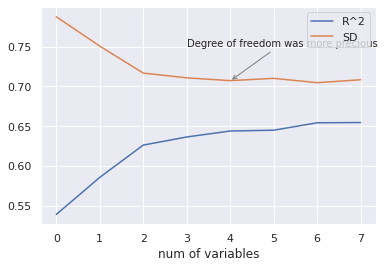

In [17]:
f, ax = plt.subplots(1, 1)

x_scale=np.arange(R_sq.shape[0])
ax.plot(x_scale, R_sq)
ax.plot(x_scale, SD)
plt.legend(['R^2', 'SD'])
plt.xlabel('num of variables')

ax.annotate(
    "Degree of freedom was more precious", 
    xy=(4, 0.707), 
    xytext=(3, 0.75), 
    arrowprops={"arrowstyle":"->", "color":"gray"})


<img src="attachment:ce480e8e-b600-41bb-b655-476b5405ad17.png">

In [18]:
lmod_on_lpsa = smf.ols(
        formula="lpsa ~ lcavol", 
        data=prostate).fit()
lmod_on_lpsa.sumary()

          coefs stderr tvalues pvalues
Intercept 1.507  0.122   12.36  0.0000
lcavol    0.719  0.068   10.55  0.0000

n=97 p=2 Residual SD=0.787 R-squared=0.54


In [19]:
lmod_on_lcavol = smf.ols(
        formula="lcavol ~ lpsa", 
        data=prostate).fit()
lmod_on_lcavol.sumary()

           coefs stderr tvalues pvalues
Intercept -0.509  0.194   -2.62  0.0103
lpsa       0.750  0.071   10.55  0.0000

n=97 p=2 Residual SD=0.804 R-squared=0.54


Text(0, 2.4783870103092784, '2.48')

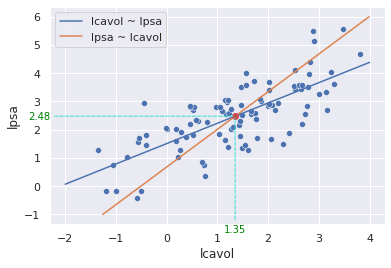

In [20]:
plt.plot(
    [-2, 4], 
    [
        lmod_on_lpsa.predict(pd.Series({"lcavol": -2})), 
        lmod_on_lpsa.predict(pd.Series({"lcavol": 4}))
    ]
)
plt.plot(
    [
        lmod_on_lcavol.predict(pd.Series({"lpsa": -1})), 
        lmod_on_lcavol.predict(pd.Series({"lpsa": 6}))
    ], 
    [-1, 6]
)
plt.legend(['lcavol ~ lpsa', 'lpsa ~ lcavol'])

sns.scatterplot(y="lpsa", x="lcavol", data=prostate)
# Intercept
x0 = prostate["lcavol"].mean()
y0 = prostate["lpsa"].mean()
plt.plot(x0, y0, 'ro')
arrowprops={'arrowstyle': '-', 'ls':'--', "color":"turquoise"}
plt.annotate(str(x0.round(2)), xy=(x0, y0), xytext=(x0, 0), 
             textcoords=plt.gca().get_xaxis_transform(),
             arrowprops=arrowprops, color="green",
             va='top', ha='center')
plt.annotate(str(y0.round(2)), xy=(x0,y0), xytext=(0, y0), 
             textcoords=plt.gca().get_yaxis_transform(),
             arrowprops=arrowprops, color="green",
             va='center', ha='right')

<img src=attachment:6992d5a0-38c3-4a34-a1d4-9a40c963d909.png width=700>

In [21]:
lmod = smf.ols(
        formula="lpsa ~ lcavol + lweight + svi + lbph + age + lcp + pgg45 + gleason", 
        data=prostate).fit()
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept  0.669  1.296    0.52  0.6069
lcavol     0.587  0.088    6.68  0.0000
lweight    0.454  0.170    2.67  0.0090
svi        0.766  0.244    3.14  0.0023
lbph       0.107  0.058    1.83  0.0704
age       -0.020  0.011   -1.76  0.0823
lcp       -0.105  0.091   -1.16  0.2496
pgg45      0.005  0.004    1.02  0.3089
gleason    0.045  0.157    0.29  0.7750

n=97 p=9 Residual SD=0.708 R-squared=0.65


In [22]:
lmod.bse["age"]

0.011172724877546437

Formula for the confidence interval for $\hat{\beta_i}$: </br>
$$ \hat{\beta_i} \pm t_{n-p}^{(\alpha/2)}se{(\hat{\beta_i})}$$

In [23]:
for alpha in [0.1, 0.05, 0.0001]:
    # get (1-a)/2 and a/2 percentiles
    # (which are only different in sign by symmetricity)
    qt = np.array(sp.stats.t.interval(1 - alpha, lmod.df_resid))
    print("alpha =", alpha, ":", lmod.params["age"] + lmod.bse["age"]*qt)

alpha = 0.1 : [-0.0382102  -0.00106415]
alpha = 0.05 : [-0.04184062  0.00256627]
alpha = 0.0001 : [-0.06518228  0.02590793]


Alternatively, this could be easily obtained from the package:

In [24]:
for alpha in [0.1, 0.05, 0.0001]:
    print(lmod.conf_int(alpha).loc["age"])


0   -0.038210
1   -0.001064
Name: age, dtype: float64
0   -0.041841
1    0.002566
Name: age, dtype: float64
0   -0.065182
1    0.025908
Name: age, dtype: float64


Naturally, as confidence level $1-\alpha$ increases (that is, as $\alpha$ decreases),  the length of the interval increases as well. </br>
By duality of two-tailed hyp tests and confidence intervals, we conclude that $H_0: \beta_{age}=0$ is not rejected at significance level $\alpha=0.05$, but is rejected at $\alpha=0.1$ </br>
This suggests that the $p$-value for *age* lies in $(0.05, 0.1]$.

In [25]:
lmod.pvalues["age"]

0.08229321418203232

which proves the last point

Another way to obtain a $p$-values is to use the permutation test. </br>
Recall, that we are know testing whether a parameter is statistically significant to the chosen model. </br>
Then, the idea of a permutation test: if the parameter is not statistically significant, then the t-values which arise from permuting the values of the predictor should be uniformly distributed. </br>
So: permute the param, calculate test statistic for each ($\le{n!}$), compare the mean to the original value.

In [26]:
# n! is too big even for small datasets;
# in our case, n=97 => n!= 9.6e+151
perm_n = 4000
tstats= np.zeros(perm_n)
np.random.seed(42)
prostate_c = prostate.copy()

for i in range(0,perm_n):
    prostate_c['age_perm'] = np.random.permutation(
        np.copy(prostate_c['age'])
    )
    lmodi = smf.ols(
        'lpsa ~ lcavol + lweight + svi + lbph + age_perm + lcp + pgg45 + gleason', 
        prostate_c).fit()
    tstats[i] = lmodi.tvalues["age_perm"]
    
np.mean(np.abs(tstats) > np.abs(lmod.tvalues["age"]))

0.07875

The value is simillar to the $p$-value obtained from the t-test. </br>
> Since the permutation
test does not depend on the assumption of normality, we might regard it as superior 
to the normal theory based value. </br> In this case, the results are very similar and not 
close to any decision boundary. </br> But if there was some crucial difference in the conclusion 
and there was some evidence of nonnormal errors, then we would prefer the
permutation-based test.

The difference that comes from those two p-values is affected by how adequete the normal assumption on the population is.

In conclusion, 
> In practice, many will simply use the normal
assumption-based tests </br> but this can be done in the knowledge that the permutation
tests will tend to agree, provided the assumption is justifiable.

<img src=attachment:a9a99130-8d8c-487b-a0ec-74481ef6d8ff.png width=700>

In [27]:
alpha = 0.05
varss = prostate.columns.values[prostate.columns.values != "lpsa"]
nonsignificant_vars = lmod.pvalues[lmod.pvalues > alpha].index.values
significant_vars = np.setdiff1d(varss, nonsignificant_vars)

lmod_sign = smf.ols(
        'lpsa ~ ' + ' + '.join(significant_vars), 
        prostate).fit()

lmod.sumary()
print("R-squared adj=", lmod.rsquared_adj.round(2), '\n\n')
lmod_sign.sumary()
print("R-squared adj=", lmod_sign.rsquared_adj.round(2))

           coefs stderr tvalues pvalues
Intercept  0.669  1.296    0.52  0.6069
lcavol     0.587  0.088    6.68  0.0000
lweight    0.454  0.170    2.67  0.0090
svi        0.766  0.244    3.14  0.0023
lbph       0.107  0.058    1.83  0.0704
age       -0.020  0.011   -1.76  0.0823
lcp       -0.105  0.091   -1.16  0.2496
pgg45      0.005  0.004    1.02  0.3089
gleason    0.045  0.157    0.29  0.7750

n=97 p=9 Residual SD=0.708 R-squared=0.65
R-squared adj= 0.62 


           coefs stderr tvalues pvalues
Intercept -0.268  0.543   -0.49  0.6230
lcavol     0.552  0.075    7.39  0.0000
lweight    0.509  0.150    3.39  0.0010
svi        0.666  0.210    3.18  0.0020

n=97 p=4 Residual SD=0.717 R-squared=0.63
R-squared adj= 0.61


Judging by the main metrics, the model has become strictly worse, though the actual difference is small

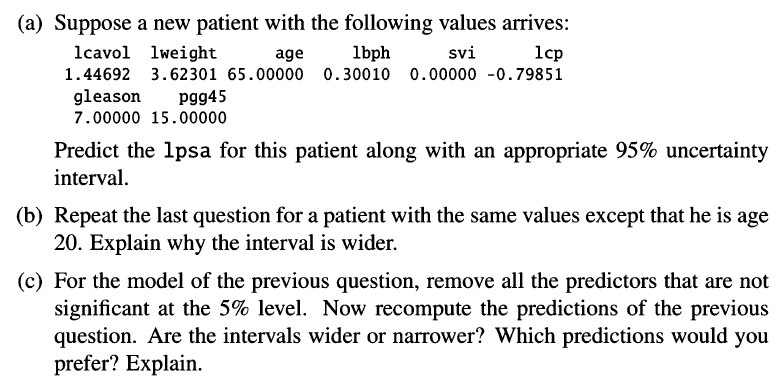

In [30]:
x0 = pd.Series({
    "lcavol": 1.44692, 
    "lweight": 3.62301, 
    "age": 65, 
    "lbph": 0.3001, 
    "svi": 0, 
    "lcp": -0.79851, 
    "gleason": 7, 
    "pgg45": 15
})
x0

lcavol      1.44692
lweight     3.62301
age        65.00000
lbph        0.30010
svi         0.00000
lcp        -0.79851
gleason     7.00000
pgg45      15.00000
dtype: float64

In [32]:
lmod.get_prediction(x0).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.389053,0.109001,2.172437,2.605669,0.964658,3.813447


In [33]:
x1 = x0.copy()
x1["age"] = 20
x1

lcavol      1.44692
lweight     3.62301
age        20.00000
lbph        0.30010
svi         0.00000
lcp        -0.79851
gleason     7.00000
pgg45      15.00000
dtype: float64

In [34]:
lmod.get_prediction(x1).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.272726,0.509378,2.260444,4.285007,1.538744,5.006707


The reason why both mean and obs intervals are wider is that the specified variable value is not represented in the dataset. In other words, quantitative extrapolation occurs.

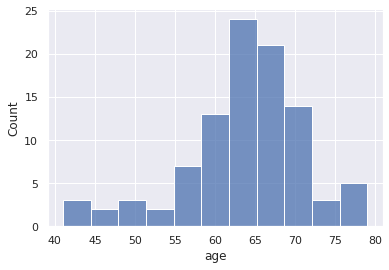

In [35]:
sns.histplot(x="age", data=prostate)

In [36]:
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept  0.669  1.296    0.52  0.6069
lcavol     0.587  0.088    6.68  0.0000
lweight    0.454  0.170    2.67  0.0090
svi        0.766  0.244    3.14  0.0023
lbph       0.107  0.058    1.83  0.0704
age       -0.020  0.011   -1.76  0.0823
lcp       -0.105  0.091   -1.16  0.2496
pgg45      0.005  0.004    1.02  0.3089
gleason    0.045  0.157    0.29  0.7750

n=97 p=9 Residual SD=0.708 R-squared=0.65


In [39]:
lmod_sign = smf.ols(
        formula="lpsa ~ lcavol + lweight + svi - 1", 
        data=prostate).fit()
lmod_sign.sumary()

        coefs stderr tvalues pvalues
lcavol  0.552  0.074    7.43  0.0000
lweight 0.436  0.031   14.24  0.0000
svi     0.668  0.209    3.20  0.0019

n=97 p=4 Residual SD=0.714 R-squared=0.93


In [40]:
lmod_sign.get_prediction(x1).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.379124,0.086888,2.206607,2.551642,0.951163,3.807086


The interval, and hence the prediction, are much more accurate, so the latter one is preferred. The reason why we've been able to obtain much more accurate prediction is that we no longer needed to account for unrepresented, statistically insignificant variables in our dataset. That is, we didn't have to extrapolate for insignificant (underrepresented) variables. In particular, we got rid of the $age$.

Since we got rid of the $age$, the prediction is the same for both x0 and x1. </br> Upon closer examination, the resulting interval is close to no different from the one obtain for initial x0. This seems intuitive -- why would it be any different after we've removed statistically insignificant (at a reasonably low level) variables from the model? </br>
Conclusion: the resulting models are the same in terms of prediction. -- not rly.

Removing the variables serves the purpose. Claim(is it true?): extrapolation w.r.t statistically insignificant variables is more costly
Not really. Extrapolation is plugging values far from the sample. It has nothing to do with statistical significance really. How does then eliminating statistically significant variables help with our prediction?

our sample gives us the relationship between variables. 
1) removing statistically insignificant variables does not affect our prediction interval. </br>
2) the less the variables, the less is the chance that our x0 asks for extrapolation.
imagine in your x0 you provide a relation between the variables that lacks the evidence in the sample -- extrapolation occurs. If we however removed one of the variables, it would no longer be the case. So, we are happy to remove as much variables as we want, provided it will not underrepresented the informatioin in the sample. But that's exactly what we did -- we removed statistically insignificant variables from the sample